# Important Notes:
* Rename this file as "ID.ipynb" where "ID" represents your student ID.
* Do not modify content or order of any cells with ***questions***
* Use the given empty cells to write code and feel free to add extra cells if needed
* When you need to write an answer make sure the cell is ***Markdown***
* Submit the jupyter notebook "ID.ipynb" along with the pdf version of the notebook **"ID.pdf"**

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [5]:
def load_application():
    data = pd.read_csv(r'C:\Users\71589\Desktop\dataset\Rice_Cammeo_Osmancik.csv')
    return data
df = load_application()

In [6]:
df

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

In [18]:
class_counts = df['Class'].value_counts()
 # Here i will Count the occurrences of each class

In [15]:
class_percentages = df['Class'].value_counts(normalize=True) * 100 #here i will git the percentage of the class's 

In [19]:
class_counts, class_percentages

(Class
 Osmancik    2180
 Cammeo      1630
 Name: count, dtype: int64,
 Class
 Osmancik    57.217848
 Cammeo      42.782152
 Name: proportion, dtype: float64)

### not balanced ## Osmancik ## having a higher representation than ## Cammeo ## .

**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB


In [23]:
observations = df.shape[0]
attributes = df.shape[1] #here to know the obesrvation and the attributes 

In [25]:
df.info, observations, attributes

(<bound method DataFrame.info of         ID     Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
 0        1  15231.0  525.578979         229.749878          85.093788   
 1        2  14656.0  494.311005         206.020065          91.730972   
 2        3  14634.0  501.122009         214.106781          87.768288   
 3        4  13176.0  458.342987         193.337387          87.448395   
 4        5  14688.0  507.166992         211.743378          89.312454   
 ...    ...      ...         ...                ...                ...   
 3805  3806  11441.0  415.858002         170.486771          85.756592   
 3806  3807  11625.0  421.390015         167.714798          89.462570   
 3807  3808  12437.0  442.498993         183.572922          86.801979   
 3808  3809   9882.0  392.296997         161.193985          78.210480   
 3809  3810  11434.0  404.709992         161.079269          90.868195   
 
       Eccentricity  Convex_Area    Extent     Class  
 0         0.928882    

**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [27]:
# id dropped because its not useful for the analysis 
# Drop 'ID' as it's not useful for analysis
df = df.drop(columns=['ID'])

In [29]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [31]:
# here i count the missing opservation
missing_values = df.isnull().sum()

In [32]:
# Drop rows with missing values
df = df.dropna()

In [33]:
# Outputs: Missing values and new dataset shape
missing_values, df.shape

(Area                 0
 Perimeter            0
 Major_Axis_Length    0
 Minor_Axis_Length    0
 Eccentricity         0
 Convex_Area          0
 Extent               0
 Class                0
 dtype: int64,
 (3801, 8))

**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [34]:
# List of numeric column names
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Eccentricity',
 'Convex_Area',
 'Extent']

**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [35]:
#statistics for numeric columns
five_number_summary = df[numeric_columns].describe()
five_number_summary

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,12666.944751,454.224257,188.774025,86.309194,0.886881,12951.563273,0.661917
std,1732.606672,35.595402,17.446952,5.733743,0.020819,1777.147195,0.077252
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11372.000000,426.165008,174.358124,82.721268,0.872438,11627.000000,0.598778
50%,12419.000000,448.846008,185.801941,86.428650,0.889033,12705.000000,0.645370
75%,13950.000000,483.657989,203.523453,90.133011,0.902622,14280.000000,0.726608
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

##### a) Correlation table

In [37]:
# Correlation table
correlation_table = df[numeric_columns].corr()

In [38]:
correlation_table

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.902898,0.787943,0.351215,0.998948,-0.061449
Perimeter,0.966453,1.000000,0.971865,0.629873,0.543913,0.969916,-0.131078
Major_Axis_Length,0.902898,0.971865,1.000000,0.451995,0.710420,0.903267,-0.139899
Minor_Axis_Length,0.787943,0.629873,0.451995,1.000000,-0.292421,0.787418,0.063317
Eccentricity,0.351215,0.543913,0.710420,-0.292421,1.000000,0.351834,-0.198921
Convex_Area,0.998948,0.969916,0.903267,0.787418,0.351834,1.000000,-0.066024
Extent,-0.061449,-0.131078,-0.139899,0.063317,-0.198921,-0.066024,1.000000


##### b) Pairplot for relationships between every two numeric columns in the dataset


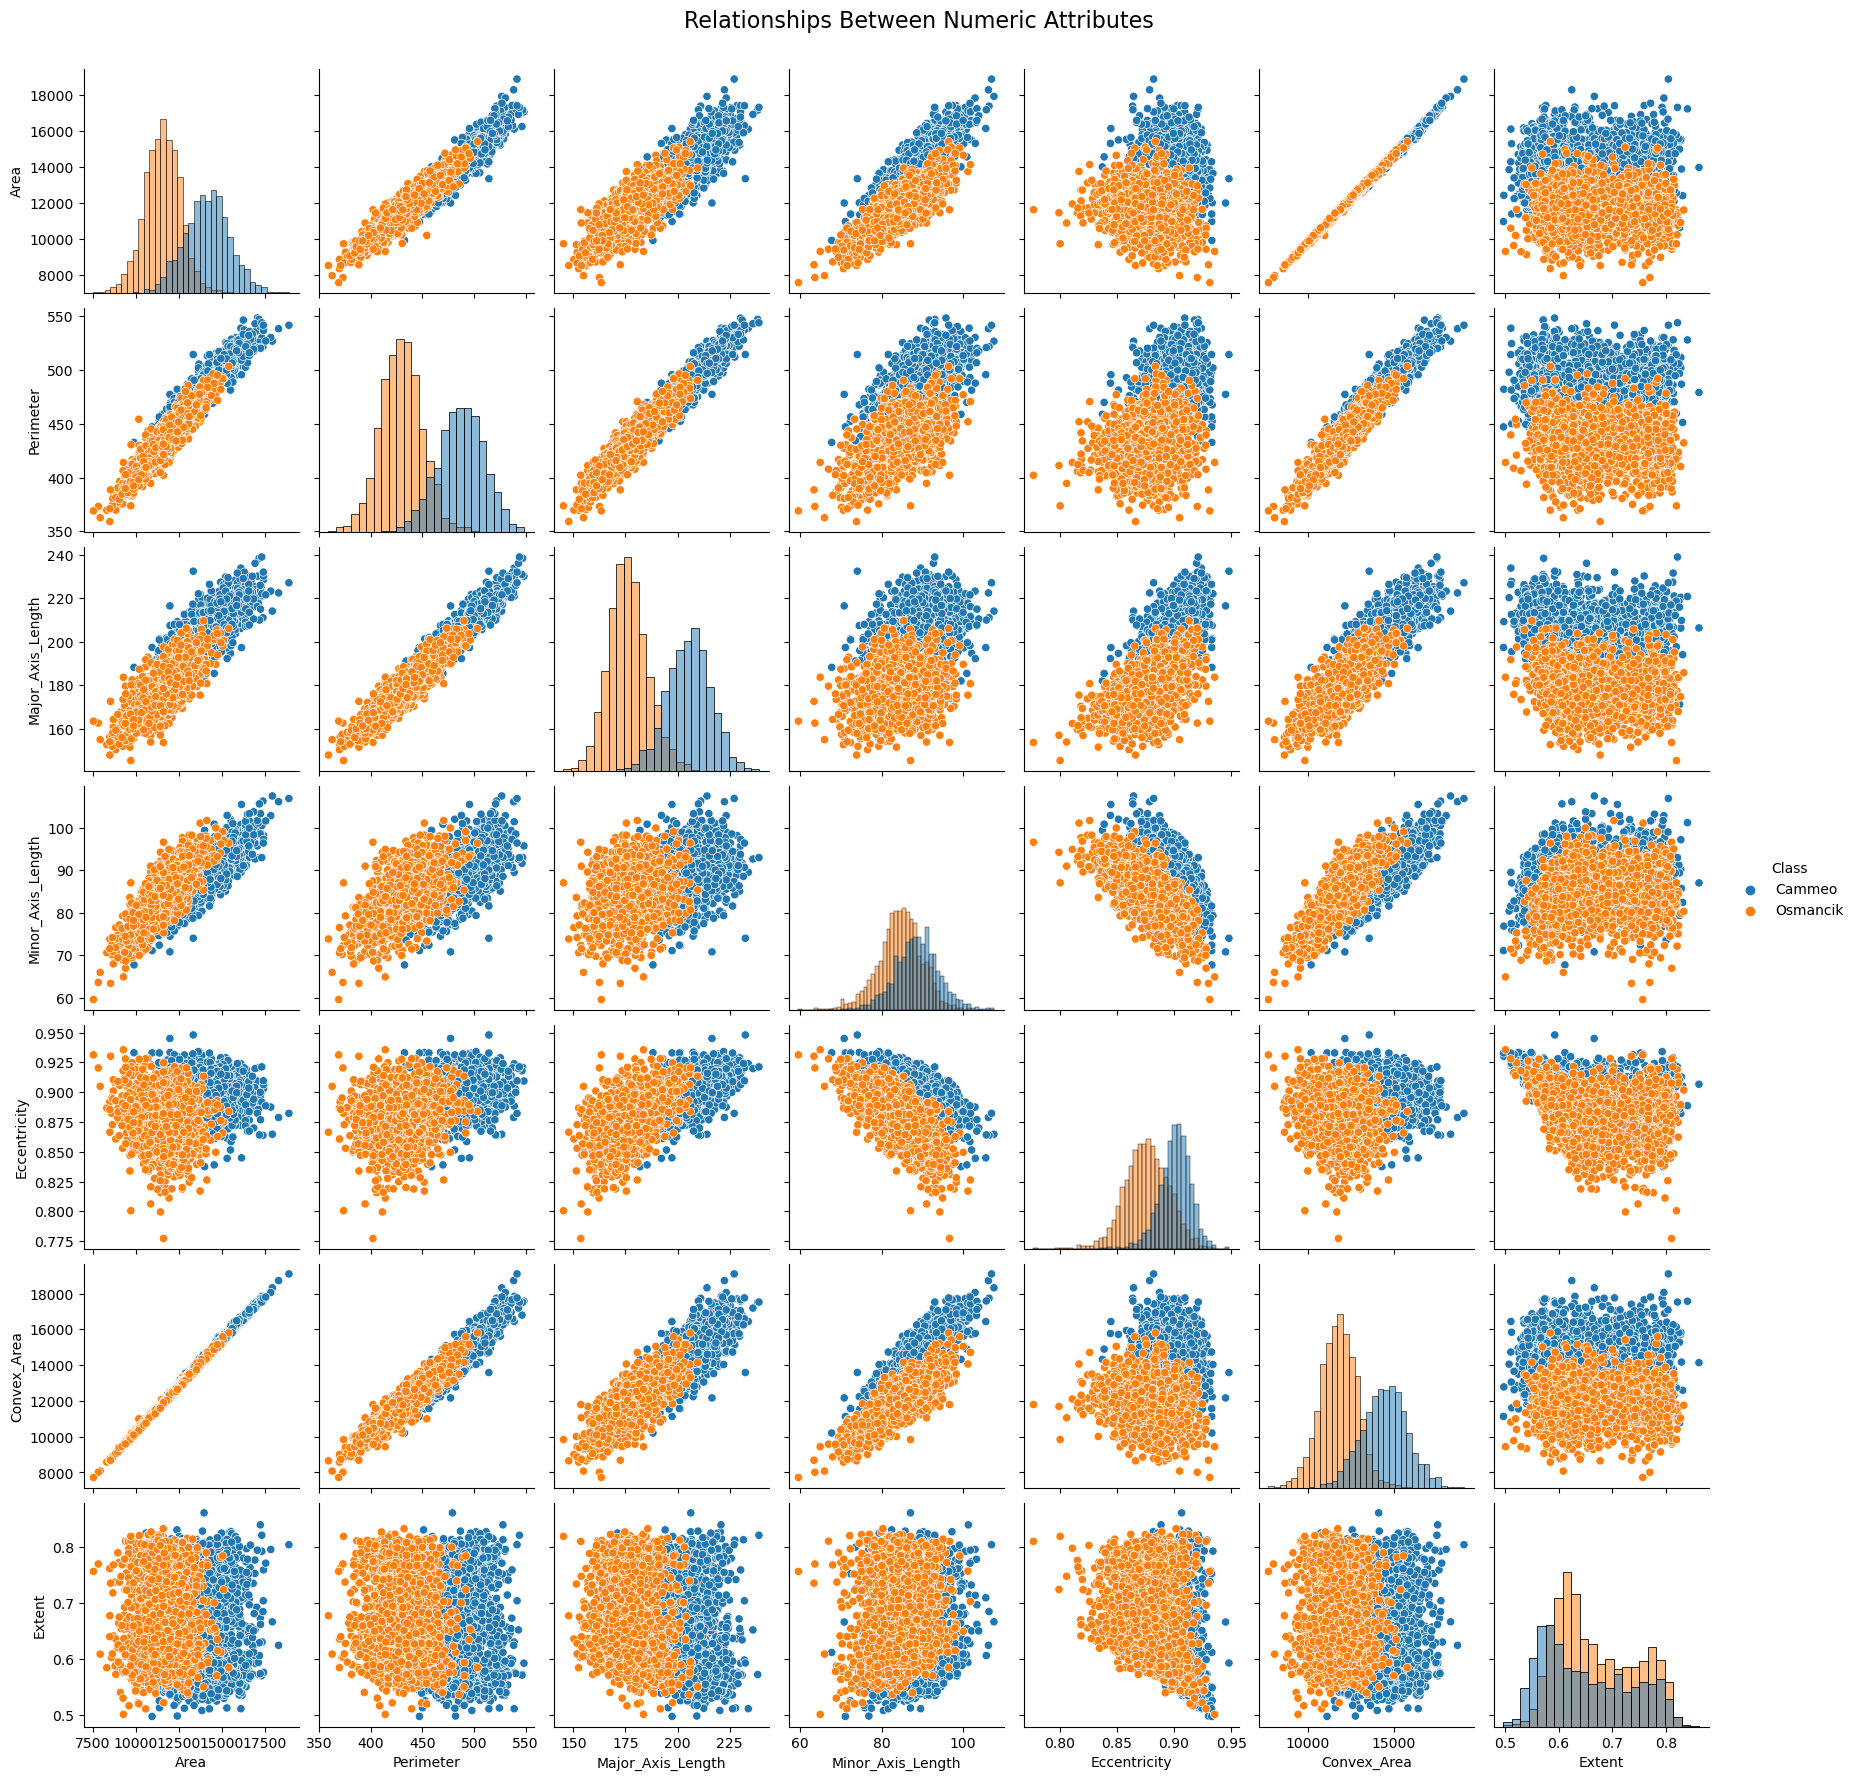

In [48]:
# Generate the pairplot and assign it to a variable
pairplot = sns.pairplot(df, hue='Class', diag_kind='hist')

# Add a title to the figure
pairplot.fig.suptitle('Relationships Between Numeric Attributes', y=1.02, fontsize=16)

# Show the plot
plt.show()


**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

##### a)Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately

In [50]:
# Filter the data by class using the correct dataframe
cammeo_data = df[df['Class'] == 'Cammeo']
osmancik_data = df[df['Class'] == 'Osmancik']

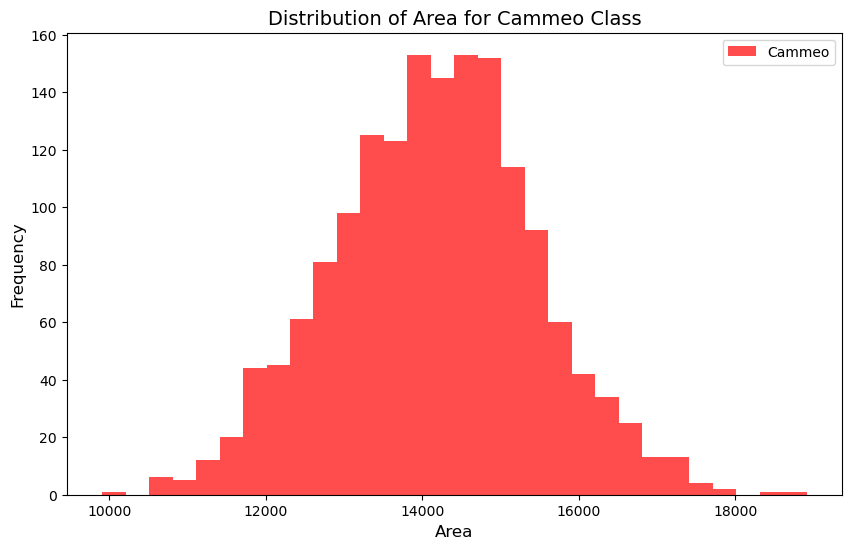

In [51]:
# Histogram for Cammeo
plt.figure(figsize=(10, 6))
plt.hist(cammeo_data['Area'], bins=30, alpha=0.7, label='Cammeo', color='red')
plt.title('Distribution of Area for Cammeo Class', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

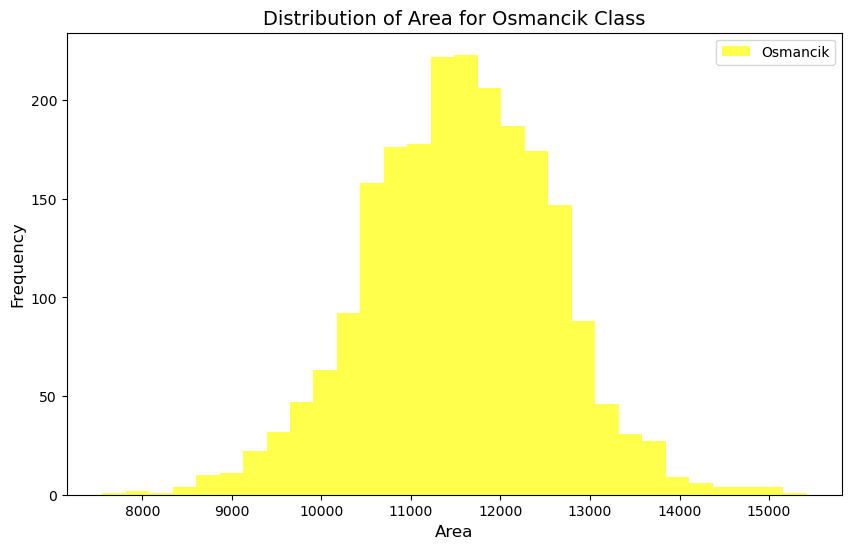

In [52]:
# Histogram for Osmancik
plt.figure(figsize=(10, 6))
plt.hist(osmancik_data['Area'], bins=30, alpha=0.7, label='Osmancik', color='yellow')
plt.title('Distribution of Area for Osmancik Class', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

##### b) Point out the differences between the two histograms

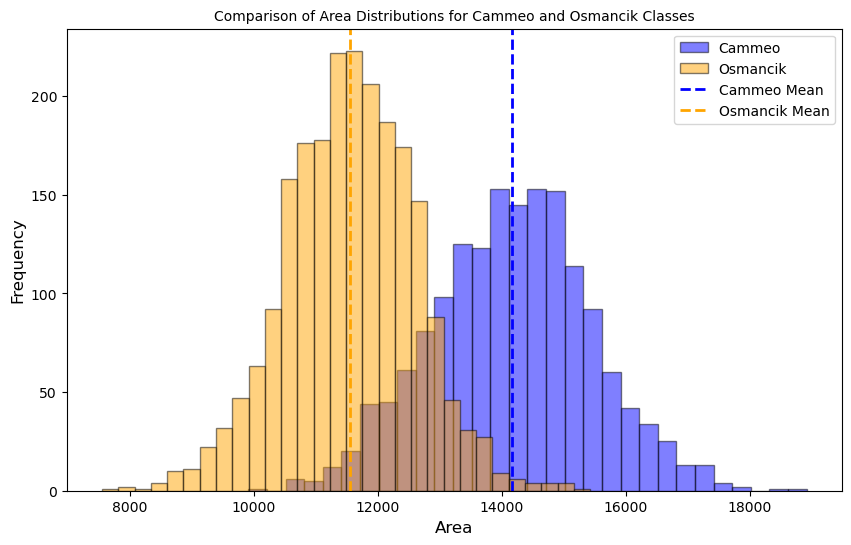

In [56]:
plt.figure(figsize=(10, 6))

# Histogram for Cammeo
plt.hist(cammeo_data['Area'], bins=30, alpha=0.5, label='Cammeo', color='blue', edgecolor='black')

# Histogram for Osmancik
plt.hist(osmancik_data['Area'], bins=30, alpha=0.5, label='Osmancik', color='orange', edgecolor='black')

# Add vertical lines for means
plt.axvline(cammeo_data['Area'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Cammeo Mean')
plt.axvline(osmancik_data['Area'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Osmancik Mean')

plt.title('Comparison of Area Distributions for Cammeo and Osmancik Classes', fontsize=10)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.show()



## The plot shows that Cammeo has a higher mean area and is more concentrated, while Osmancik has a lower mean and a wider spread. There is some overlap, but the two classes are generally distinct.








**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

##### Part (a): Create boxplots for each numeric attribute to identify outliers



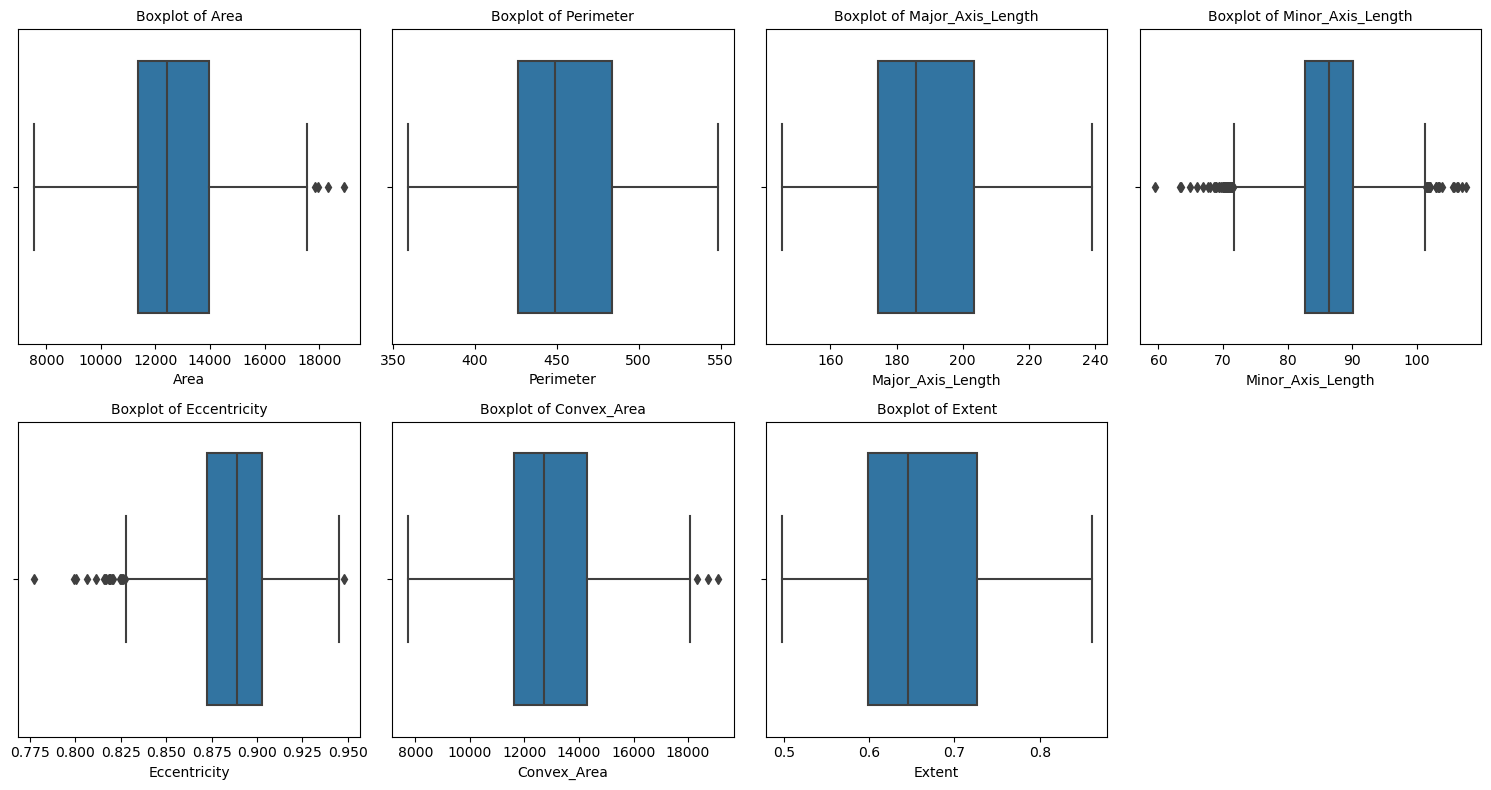

In [64]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Boxplots for original data
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)  # Adjust grid dimensions based on the number of numeric columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

##### Part (b): Scale the data and redo the boxplots 

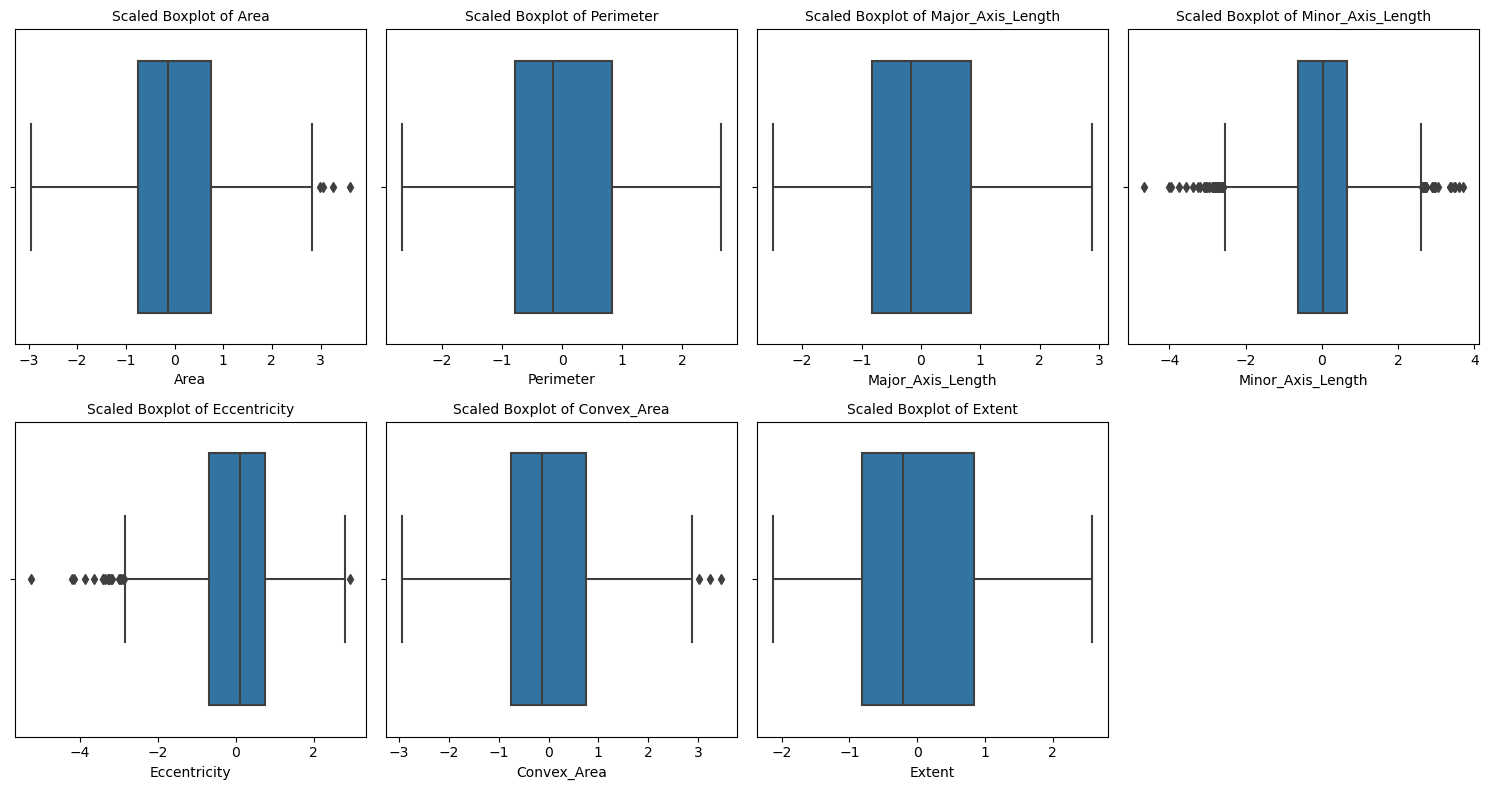

In [65]:
scaler = StandardScaler()
scaled_df = df.copy()  
scaled_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scale numeric columns

# Boxplots for scaled data
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)  # Adjust grid dimensions based on the number of numeric columns
    sns.boxplot(x=scaled_df[col])
    plt.title(f'Scaled Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [67]:
# Encode 'Class'
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [68]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,1
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,1
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,1
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,1


## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

#### a.Create feature (X) of the scaled data and target (y)


In [81]:
# Step 12(a): Create features (X) and target (y)
X = df[numeric_columns]  # Features
y = df['Class']  # Target

#### b.Split the dataset into a training set (70%) and testing set (30%)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Ensures same proportion of classes
)

#### c.Initialize KNN with one neighbor


In [83]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### d.# Predict and evaluate


In [89]:
y_pred = knn.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)

In [93]:
classification_report_result

'              precision    recall  f1-score   support\n\n           0       0.83      0.84      0.83       488\n           1       0.88      0.87      0.87       653\n\n    accuracy                           0.86      1141\n   macro avg       0.85      0.85      0.85      1141\nweighted avg       0.86      0.86      0.86      1141\n'

## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)

#### (a): Apply Logistic Regression

In [95]:
logistic = LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### (b): Apply Grid Search to find the best hyperparameters

In [96]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for optimization
}
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

#### (c): Best model and classification report

In [97]:
best_lr_model = grid_search.best_estimator_  # Best Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)
classification_report_lr = classification_report(y_test, y_pred_lr)

#### (d): Compare Logistic Regression with KNN

In [98]:
knn_accuracy = knn.score(X_test, y_test) * 100
lr_accuracy = best_lr_model.score(X_test, y_test) * 100
best_params = grid_search.best_params_

In [100]:
knn_accuracy ,lr_accuracy 

(85.71428571428571, 92.02453987730061)

In [101]:
comparison = (
    f"Comparison of Models:\n"
    f"---------------------\n"
    f"1. KNN Model:\n"
    f"   - Accuracy: {knn_accuracy:.2f}%\n"
    f"   - Observations: Good performance, but simple distance-based classifier.\n"
    f"2. Logistic Regression (Best Hyperparameters):\n"
    f"   - Best Parameters: {best_params}\n"
    f"   - Accuracy on Training (CV): {grid_search.best_score_ * 100:.2f}%\n"
    f"   - Accuracy on Testing: {lr_accuracy:.2f}%\n"
    f"   - Observations: More interpretable and tunable, with competitive accuracy."
)

In [102]:
classification_report_lr, comparison


('              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.91       488\n           1       0.93      0.93      0.93       653\n\n    accuracy                           0.92      1141\n   macro avg       0.92      0.92      0.92      1141\nweighted avg       0.92      0.92      0.92      1141\n',
 "Comparison of Models:\n---------------------\n1. KNN Model:\n   - Accuracy: 85.71%\n   - Observations: Good performance, but simple distance-based classifier.\n2. Logistic Regression (Best Hyperparameters):\n   - Best Parameters: {'C': 10, 'solver': 'liblinear'}\n   - Accuracy on Training (CV): 93.46%\n   - Accuracy on Testing: 92.02%\n   - Observations: More interpretable and tunable, with competitive accuracy.")

## Logistic Regression performed better than KNN, with 92.02% accuracy on the test set. It’s more reliable and easier to tune for this task.